# Seaborn - Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
iris['species'].nunique()

3

## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

#### create first a pairplot to see the values and the features of the dataset

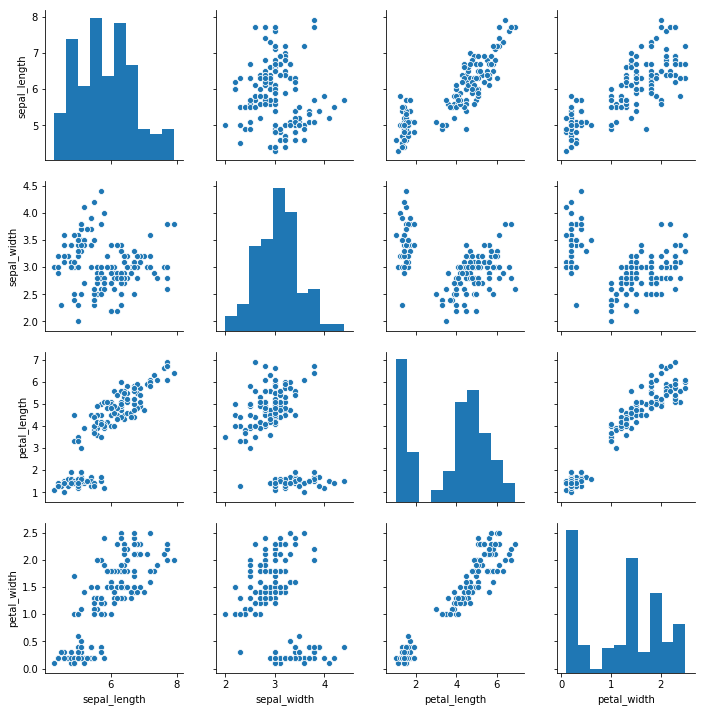

In [6]:
sns.pairplot(iris)

#### Starting creating the grid

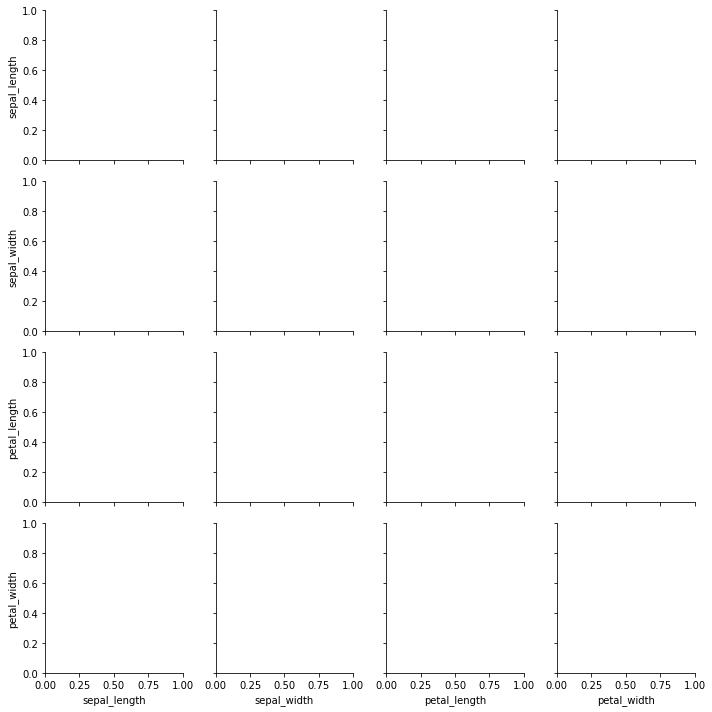

In [7]:
# Just the Grid
sns.PairGrid(iris)

As seen above, it takes all the numerical columns and grids them up essentially kind of making the subplots for us.

Note: Pairplot gives you the plots automatically, but PairGrid gives you more control of the grid and the plots.

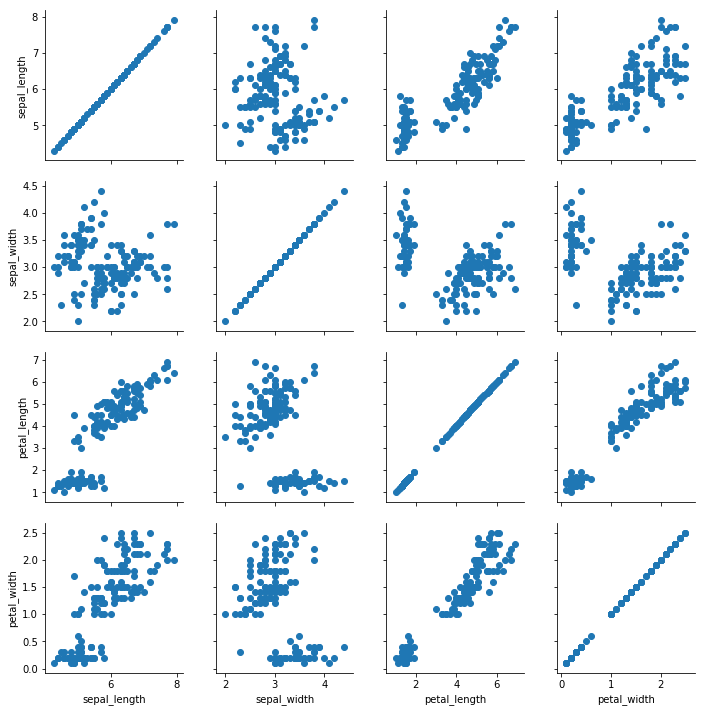

In [8]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)  # here it maps a scatter plot

### Map different kinds of plots to:
* upper part of the diagonal
* lower part of the diagonal
* the diagonal itself

Note: It may takes a little few to show the results because of the computations that take place. It depends on computer performance.

/home/iotlab_user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


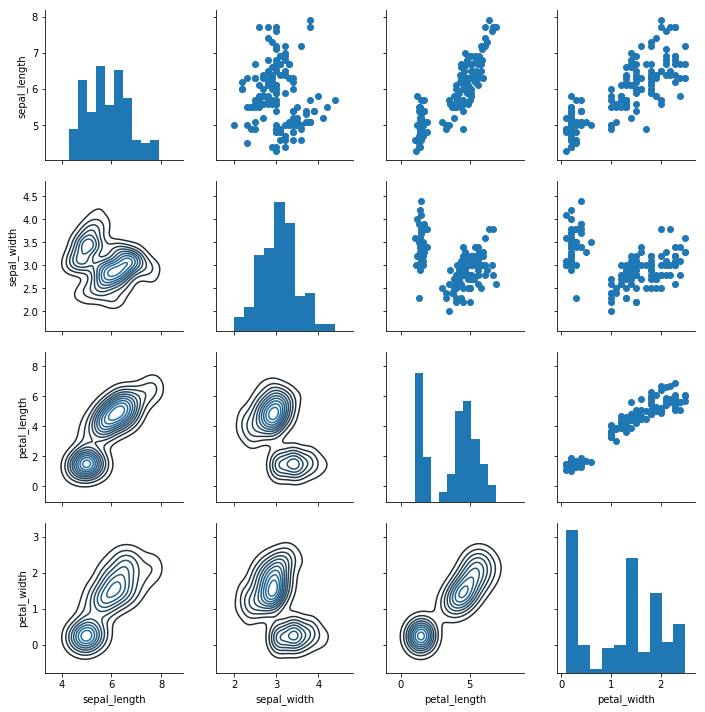

In [9]:
# Map to upper,lower, and diagonal (method 1)
g = sns.PairGrid(iris)
g.map_diag(plt.hist)  # in the next cell you will see instead of 'plt.hist' we use the 'sns.distplot' to draw the histograms
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

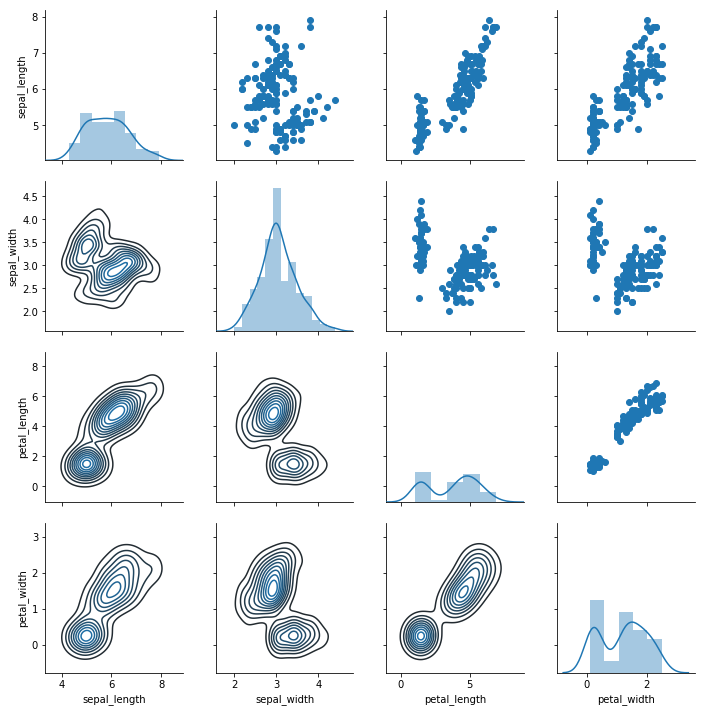

In [10]:
# Map to upper,lower, and diagonal (method 2)
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot

pairplot is a simpler version of PairGrid (you'll use quite often)

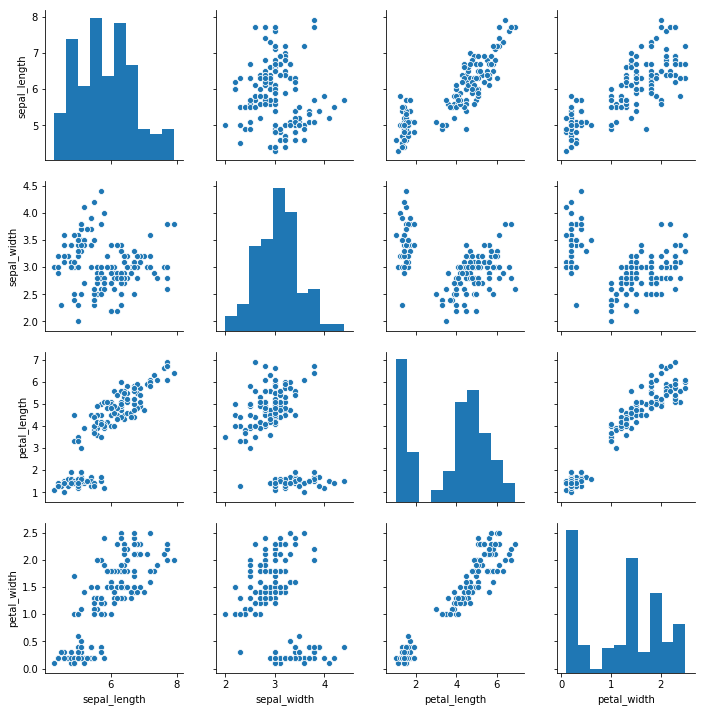

In [11]:
sns.pairplot(iris)

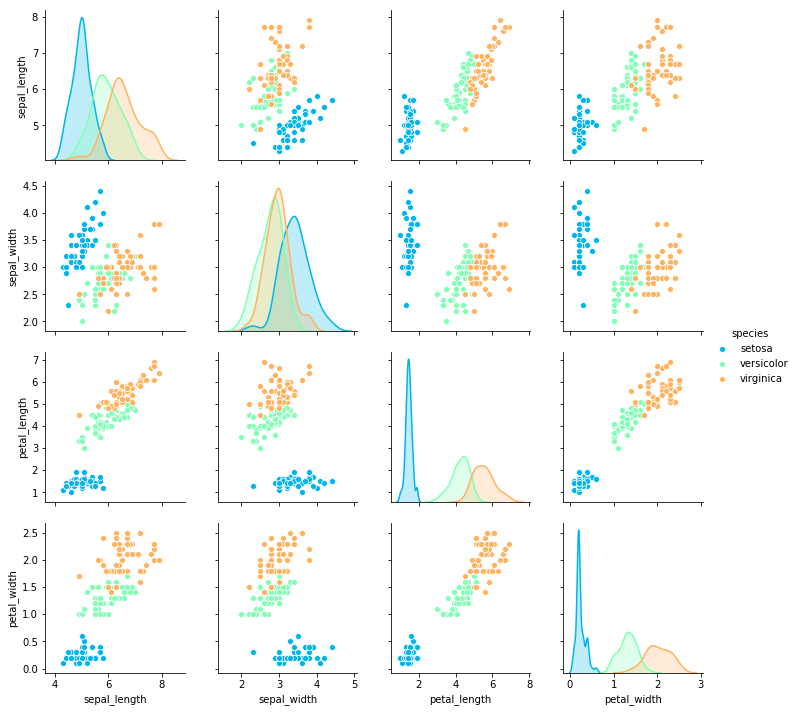

In [12]:
sns.pairplot(iris,hue='species',palette='rainbow')

## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

In [13]:
tips = sns.load_dataset('tips')

In [14]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


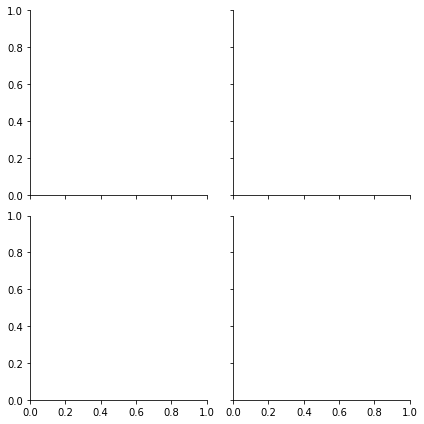

In [15]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker") # cols and rows are the variables we want to separate for our Grid
# col, row are categorical features

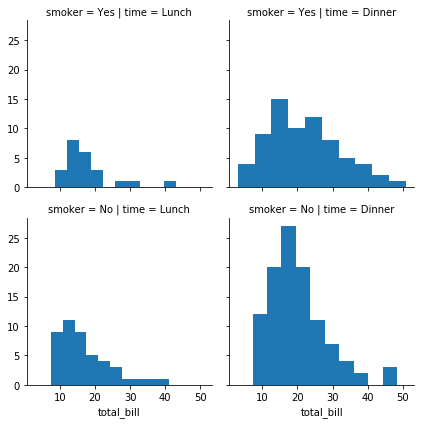

In [16]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill") # we add the argument we want to map! (Method 1: plt.hist)
# 'total_bill' is numerical feature presented relatively to the categorical features.

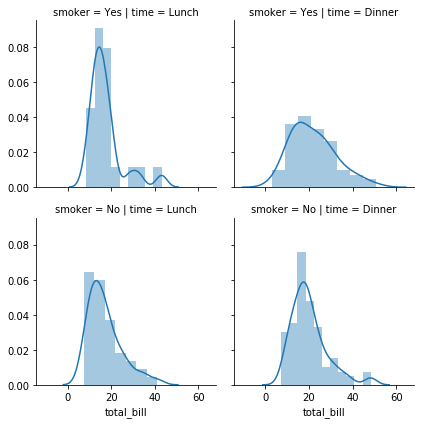

In [17]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(sns.distplot, "total_bill") # we add the argument we want to map! (Method 2: sns.distplot)
# 'total_bill' is numerical feature presented relatively to the categorical features.

### Note: The distplot takes only one numerical argument

### Next, the scatter plot takes two numerical arguments

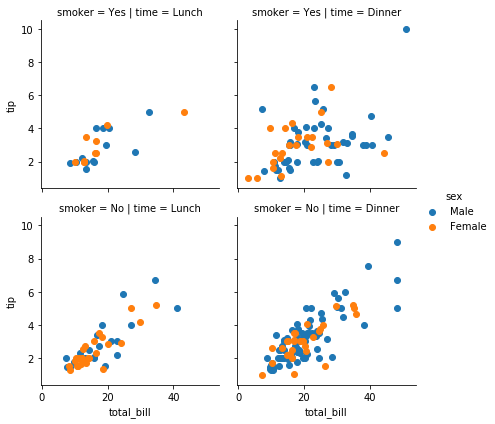

In [18]:
g = sns.FacetGrid(tips, col="time",  row="smoker", hue='sex')
# Notice how the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

#### Adding the 'hue' argument with the categorical value 'sex'

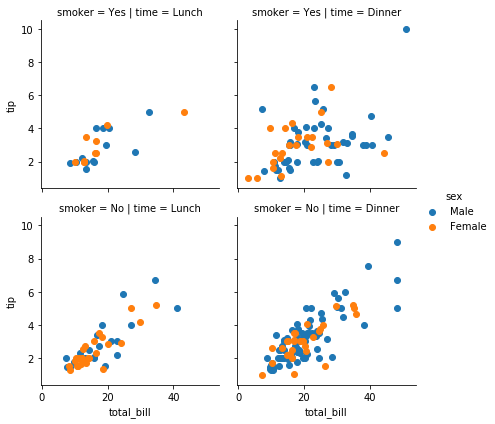

In [19]:
g = sns.FacetGrid(tips, col="time",  row="smoker", hue='sex')
# Notice how the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

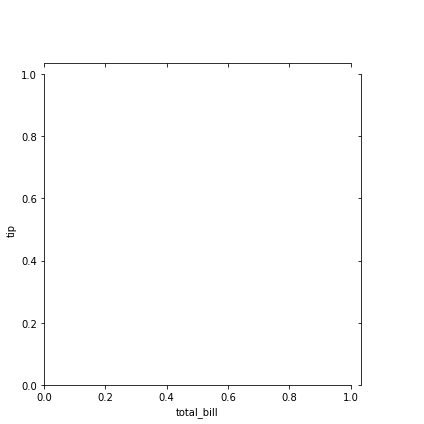

In [20]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

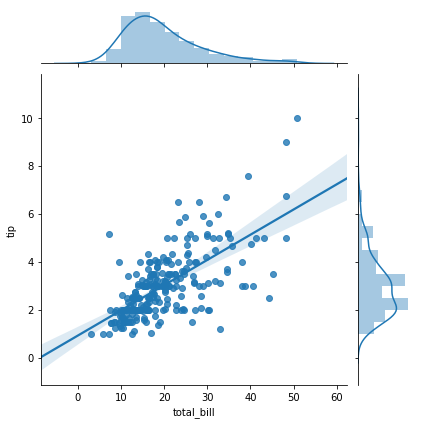

In [21]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

Reference the documentation as necessary for grid types, but most of the time you'll just use the easier plots discussed earlier.